<a href="https://colab.research.google.com/github/Okelezo/Coding-a-Linear-Regression-Model-from-Scratch/blob/main/CC_Fraud_Detection_Model_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import itertools
from sklearn import svm,tree

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score,precision_recall_curve,roc_curve,recall_score, f1_score, roc_auc_score, accuracy_score,confusion_matrix,classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [2]:
file_path = "/content/PS_20174392719_1491204439457_log.csv"




In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [112]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [113]:
pd.set_option('display.float_format', '{:.2f}'.format) # To see actual values

In [114]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [115]:
df.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [116]:
df.shape

(6362620, 11)

In [117]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [52]:
# column_names = ['oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# for column in column_names:
#     df[column] = pd.to_numeric(df[column], errors='coerce')
#     # Fill NaNs with the median
#     median_value = df[column].median()
#     df[column] = df[column].fillna(median_value)

In [118]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [119]:
df.shape

(6362620, 11)

In [120]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [123]:
# Check the number of unique values in each column

df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

Exploratory Data Analysis

In [124]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

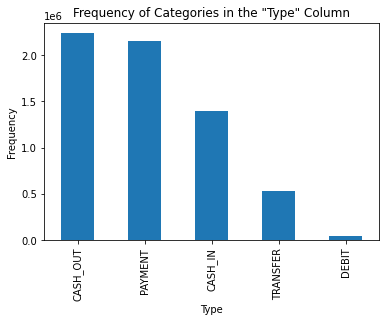

In [125]:
# Calculate the frequency of each category in the 'type' column
category_counts = df['type'].value_counts()

# Plot the bar chart
category_counts.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in the "Type" Column')

# Display the plot
plt.show()

In [126]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [127]:
print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.87 % of the dataset
Frauds 0.13 % of the dataset


<Axes: xlabel='isFraud', ylabel='count'>

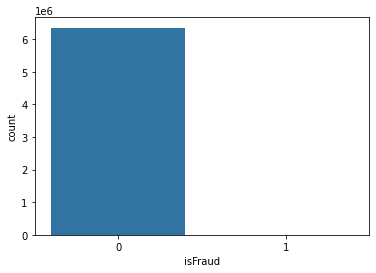

In [128]:
sns.countplot(x =df['isFraud'])

In [129]:
fraud_count = df['isFraud'].value_counts()
fraud_count

0    6354407
1       8213
Name: isFraud, dtype: int64

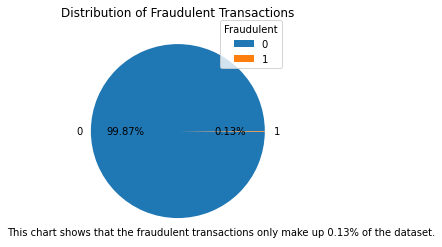

In [130]:
fraud_count = df['isFraud'].value_counts()

# create a pie chart
plt.pie(fraud_count, labels=fraud_count.keys(), autopct='%.2f%%')

# add a title to the chart
plt.title('Distribution of Fraudulent Transactions')

# add a legend to the chart
plt.legend(title='Fraudulent', loc='center right', bbox_to_anchor=(1, 0.9))

# add a note to the chart
plt.annotate('This chart shows that the fraudulent transactions only make up 0.13% of the dataset.', xy=(0.5, -1.2), ha='center')

# display the chart
plt.show()

In [131]:
unique_nameDest_count = df['nameDest'].nunique()
print(unique_nameDest_count)

2722362


In [132]:
unique_nameOrig_count = df['nameOrig'].nunique()
print(unique_nameOrig_count)

6353307


In [133]:
df = df[["step", "type", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]]

nameDest and nameOrig has lots of unique values,  I might discard them from the dataset

In [134]:
transaction = df['type'].value_counts().index
print(transaction)
quantity = df['type'].value_counts()
print(quantity)

Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [135]:
import plotly.express as px
plot = px.pie(df, values=quantity, names = transaction, hole = 0.5)
plot.show()

<Axes: ylabel='Density'>

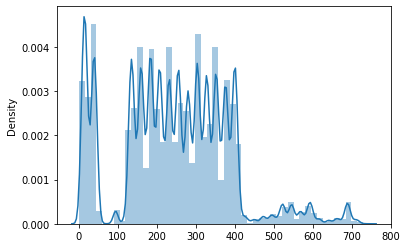

In [136]:
sns.distplot(x = df['step'])

In [137]:
fraud_ratio = df.groupby('type')['isFraud'].sum()
print(fraud_ratio)

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64


type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64


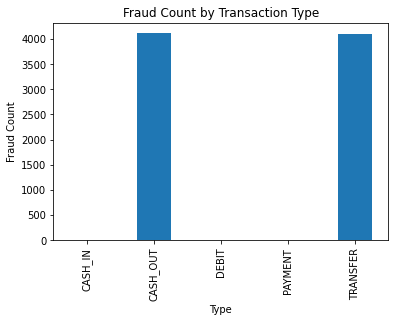

In [138]:
fraud_ratio = df.groupby('type')['isFraud'].sum()
print(fraud_ratio)

# Plot the bar chart
fraud_ratio.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Fraud Count')
plt.title('Fraud Count by Transaction Type')

# Display the plot
plt.show()


In [139]:
corr = df.corr()
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.00,0.02,-0.01,-0.01,0.03,0.03,0.03
amount,0.02,1.00,-0.00,-0.01,0.29,0.46,0.08
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.07,0.04,0.01
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.07,0.04,-0.01
oldbalanceDest,0.03,0.29,0.07,0.07,1.00,0.98,-0.01
newbalanceDest,0.03,0.46,0.04,0.04,0.98,1.00,0.00
isFraud,0.03,0.08,0.01,-0.01,-0.01,0.00,1.00


In [140]:
corr['isFraud'].sort_values(ascending=False)

isFraud           1.00
amount            0.08
step              0.03
oldbalanceOrg     0.01
newbalanceDest    0.00
oldbalanceDest   -0.01
newbalanceOrig   -0.01
Name: isFraud, dtype: float64

<Axes: >

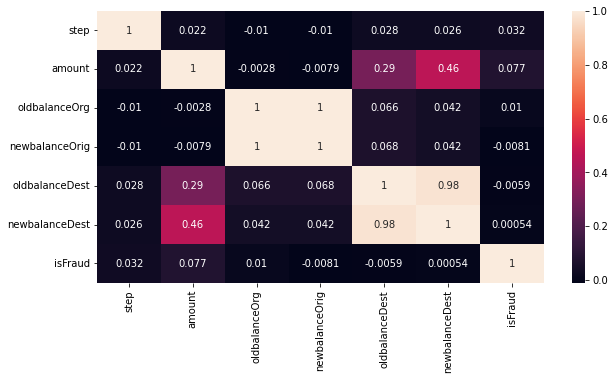

In [141]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [142]:
df['type'] = df['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})

In [143]:
# df['isFraud'] = df['isFraud'].map({0:'No_Fraud', 1:'Fraud'})

In [144]:
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,2,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,2,11668.14,41554.00,29885.86,0.00,0.00,0
5,1,2,7817.71,53860.00,46042.29,0.00,0.00,0
6,1,2,7107.77,183195.00,176087.23,0.00,0.00,0
7,1,2,7861.64,176087.23,168225.59,0.00,0.00,0
8,1,2,4024.36,2671.00,0.00,0.00,0.00,0
9,1,5,5337.77,41720.00,36382.23,41898.00,40348.79,0


<Axes: ylabel='Density'>

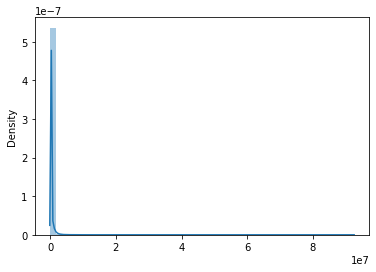

In [145]:
sns.distplot(x = df['amount'])

<Axes: ylabel='Density'>

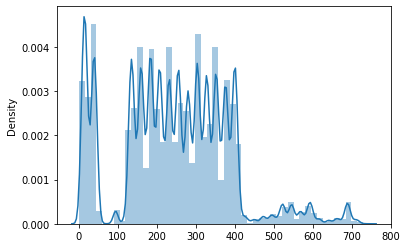

In [146]:
sns.distplot(x = df['step'])

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(3)
memory usage: 388.3 MB


In [107]:
# from sklearn.preprocessing import StandardScaler, RobustScaler

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()

# df['scaled_amount'] = rob_scaler.fit_transform(df['amount'].values.reshape(-1,1))
# df['scaled_step'] = rob_scaler.fit_transform(df['step'].values.reshape(-1,1))

# df.drop(['step','amount'], axis=1, inplace=True)

In [148]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']

In [149]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [150]:
# Split Data into Train Test Split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=32)

In [152]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score,precision_recall_curve,roc_curve,recall_score, f1_score, roc_auc_score, accuracy_score,confusion_matrix,classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [153]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Not Fraud and Fraud for 0 and 1    
class_names = ['Not Fraud','Fraud']

In [ ]:
# Logistic Regression

Logistic Accuracy is 1.00
Cross Validation Score = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906376
           1       0.36      0.43      0.39      2410

    accuracy                           1.00   1908786
   macro avg       0.68      0.72      0.70   1908786
weighted avg       1.00      1.00      1.00   1908786



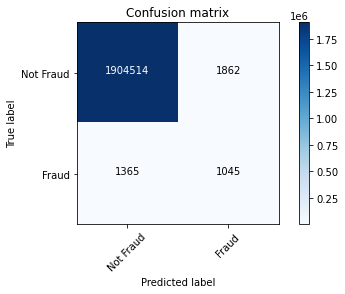

In [154]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))
score_LR = cross_val_score(LR, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion matrix for LR
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [ ]:
# K Neighbours Classification

kNN Accuracy is 1.00
Cross Validation Score = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906376
           1       0.90      0.65      0.76      2410

    accuracy                           1.00   1908786
   macro avg       0.95      0.83      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786



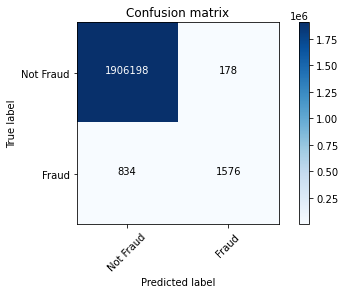

In [155]:
knn = KNeighborsClassifier(n_neighbors = 6)
#Fitting the classifier to the training set
knn.fit(X_train,y_train)
print ("kNN Accuracy is %2.2f" % accuracy_score(y_test, knn.predict(X_test)))
#The cross validation score is obtained for kNN using 10 folds
score_knn = cross_val_score(knn, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_knn)
y_pred= knn.predict(X_test)
print(classification_report(y_test, y_pred))
#Defining the confusion matrix
cm = confusion_matrix(y_test,y_pred)
#Plotting the confusion matrix
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [156]:
# SVM

In [ ]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)
print ("SVM Accuracy is %2.2f" % accuracy_score(y_test, SVM.predict(X_test)))
score_svm = cross_val_score(SVM, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_svm)
y_pred = SVM.predict(X_test)
print(classification_report(y_test,y_pred))
#Confusion matrix for SVM
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [ ]:
# Decision Trees

In [ ]:
DT = tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced",
    min_weight_fraction_leaf=0.03)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))
score_DT = cross_val_score(DT, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)
y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [ ]:
# Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))
score_rfc = cross_val_score(rfc, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Matrix for Random Forest
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [ ]:
# Ada Boost Classifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.3)
ada.fit(X_train,y_train)
print ("AdaBoost Accuracy= %2.2f" % accuracy_score(y_test,ada.predict(X_test)))
score_ada = cross_val_score(ada, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_ada)
y_pred = ada.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Marix for AdaBoost
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [ ]:
# XGB Classifier

In [ ]:
xgb = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
xgb.fit(X_train,y_train)
print ("GradientBoost Accuracy= %2.2f" % accuracy_score(y_test,xgb.predict(X_test)))
score_xgb = cross_val_score(xgb, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_ada)
y_pred = xgb.predict(X_test) 
print(classification_report(y_test,y_pred))
#Confusion Matrix for XGBoost Classifier
cm_xg = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm_xg, classes=class_names, title='Confusion matrix')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
#SVM_fpr, SVM_tpr, thresholds = roc_curve(y_test, SVM.predict_proba(X_test)[:,1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
#PLotting ROC Curves for all classifiers
plt.plot(fpr, tpr, label='KNN' )
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression')
#plt.plot(SVM_fpr, SVM_tpr, label='SVM')
plt.plot(DT_fpr, DT_tpr, label='Decision Tree')
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest')
plt.plot(ada_fpr, ada_tpr, label='AdaBoost')
plt.plot(xgb_fpr, xgb_tpr, label='GradientBoosting')
# Plot Base Rate ROC
plt.plot([0,1],[0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model = ada
model.fit(X_train, y_train)
# Printing important features in the model
print(model.feature_importances_)
importances = model.feature_importances_
feat_names = new_df.drop(['Class'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()